<a href="https://colab.research.google.com/github/envirodatascience/final-project-insect-team/blob/main/Insect_Spatial_Analysis_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

* United States Shapefile (source: GADM): https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_USA_shp.zip

* Summarized insects data (csv): https://raw.githubusercontent.com/envirodatascience/final-project-insect-team/refs/heads/main/ypm_ent_taxo_summaries_20250408.csv?token=GHSAT0AAAAAAC5MZ2PVEPMMKAYLP7M5J2XWZ7WWRGQ


In [ ]:
# import modules

# basics
import pandas as pd
import numpy as np

# geo
import geopandas as gpd

# plotting
from plotnine import *
import plotnine
import matplotlib.pyplot as plt

#shapely
from shapely.geometry import Polygon

#block warnings
import warnings
warnings.filterwarnings("ignore", message="Geometry is in a geographic CRS")

In [ ]:
url = "https://raw.githubusercontent.com/Jenamara-Agbo/Datasets/refs/heads/main/ypm_ent_taxo_summaries_20250408.csv"
insect_data = pd.read_csv(url)
insect_data.head()

year stateProvince  total_richness  total_abundance  Lepidoptera_richness  \
0  1901        Alaska               1                1                   1.0   
1  1901       Arizona               1                1                   1.0   
2  1901    California               4                6                   1.0   
3  1901      Colorado               2                3                   1.0   
4  1901   Connecticut               7                7                   6.0   

   Lepidoptera_abundance  Hymenoptera_richness  Hymenoptera_abundance  \
0                    1.0                   NaN                    NaN   
1                    1.0                   NaN                    NaN   
2                    2.0                   NaN                    NaN   
3                    1.0                   NaN                    NaN   
4                    6.0                   NaN                    NaN   

   Coleoptera_richness  Coleoptera_abundance  ...  Poduromorpha_richness  \
0                  NaN                   NaN  ...                    NaN   
1                  NaN                   NaN  ...                    NaN   
2                  3.0                   4.0  ...                    NaN   
3                  1.0                   2.0  ...                    NaN   
4                  1.0                   1.0  ...                    NaN   

   Poduromorpha_abundance  Nymphalidae_richness  Nymphalidae_abundance  \
0                     NaN                   NaN                    NaN   
1                     NaN                   NaN                    NaN   
2                     NaN                   NaN                    NaN   
3                     NaN                   1.0                    1.0   
4                     NaN                   NaN                    NaN   

   Apidae_richness  Apidae_abundance  Noctuidae_richness  Noctuidae_abundance  \
0              NaN               NaN                 NaN                  NaN   
1              NaN               NaN                 NaN                  NaN   
2              NaN               NaN                 NaN                  NaN   
3              NaN               NaN                 NaN                  NaN   
4              NaN               NaN                 NaN                  NaN   

   Papilionidae_richness  Papilionidae_abundance  
0                    NaN                     NaN  
1                    NaN                     NaN  
2                    NaN                     NaN  
3                    NaN                     NaN  
4                    NaN                     NaN  

[5 rows x 74 columns]

In [ ]:
insect_data.shape

(4175, 74)

In [ ]:
insect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         4175 non-null   int64  
 1   stateProvince                4175 non-null   object 
 2   total_richness               4175 non-null   int64  
 3   total_abundance              4175 non-null   int64  
 4   Lepidoptera_richness         3872 non-null   float64
 5   Lepidoptera_abundance        3872 non-null   float64
 6   Hymenoptera_richness         741 non-null    float64
 7   Hymenoptera_abundance        741 non-null    float64
 8   Coleoptera_richness          1021 non-null   float64
 9   Coleoptera_abundance         1021 non-null   float64
 10  Diptera_richness             668 non-null    float64
 11  Diptera_abundance            668 non-null    float64
 12  Odonata_richness             305 non-null    float64
 13  Odonata_abundance 

In [ ]:
#unique stateProvince in insect_data
insect_data["stateProvince"].unique()

array(['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Florida', 'Illinois', 'Kansas', 'Maine',
       'Massachusetts', 'Missouri', 'New Hampshire', 'New Jersey',
       'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Maryland', 'Michigan',
       'New Mexico', 'Ohio', 'Wyoming', 'Georgia', 'Indiana', 'Oklahoma',
       'Arkansas', 'District of Columbia', 'Nebraska', 'Wisconsin',
       'Minnesota', 'Idaho', 'Nevada', 'Alabama', 'Mississippi',
       'Montana', 'South Dakota', 'Iowa', 'Puerto Rico', 'Virgin Islands',
       'Kentucky', 'Louisiana', 'North Dakota', 'West Virginia', 'Hawaii'],
      dtype=object)

In [ ]:
# nunique stateProvince
insect_data["stateProvince"].nunique()

53

# SPATIAL JOIN OF THE SHAPEFILE



In [ ]:
# ! wget https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_USA_shp.zip

In [ ]:
! ls

gadm41_USA_0.cpg  gadm41_USA_1.prj  gadm41_USA_2.shx	  tl_2020_us_state.shp.ea.iso.xml
gadm41_USA_0.dbf  gadm41_USA_1.shp  gadm41_USA_shp.zip	  tl_2020_us_state.shp.iso.xml
gadm41_USA_0.prj  gadm41_USA_1.shx  sample_data		  tl_2020_us_state.shx
gadm41_USA_0.shp  gadm41_USA_2.cpg  tl_2020_us_state.cpg  tl_2020_us_state.zip
gadm41_USA_0.shx  gadm41_USA_2.dbf  tl_2020_us_state.dbf
gadm41_USA_1.cpg  gadm41_USA_2.prj  tl_2020_us_state.prj
gadm41_USA_1.dbf  gadm41_USA_2.shp  tl_2020_us_state.shp


In [ ]:
! unzip gadm41_USA_shp.zip

Archive:  gadm41_USA_shp.zip
replace gadm41_USA_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Read in shape file
us_shape = gpd.read_file("gadm41_USA_1.shp")
us_shape.head()


GID_1 GID_0        COUNTRY      NAME_1  VARNAME_1 NL_NAME_1 TYPE_1  \
0  USA.1_1   USA  United States     Alabama    AL|Ala.        NA  State   
1  USA.2_1   USA  United States      Alaska  AK|Alaska        NA  State   
2  USA.3_1   USA  United States     Arizona   AZ|Ariz.        NA  State   
3  USA.4_1   USA  United States    Arkansas    AR|Ark.        NA  State   
4  USA.5_1   USA  United States  California  CA|Calif.        NA  State   

  ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0     State   NA  US.AL  US-AL   
1     State   NA  US.AK  US-AK   
2     State   NA  US.AZ  US-AZ   
3     State   NA  US.AR  US-AR   
4     State   NA  US.CA  US-CA   

                                            geometry  
0  MULTIPOLYGON (((-88.12063 30.23321, -88.12122 ...  
1  MULTIPOLYGON (((179.20071 51.35992, 179.2001 5...  
2  POLYGON ((-110.75624 31.33288, -110.77301 31.3...  
3  POLYGON ((-91.90713 33.00801, -92.0171 33.0086...  
4  MULTIPOLYGON (((-117.233 32.77416, -117.23309 ...

In [ ]:
us_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_1      51 non-null     object  
 1   GID_0      51 non-null     object  
 2   COUNTRY    51 non-null     object  
 3   NAME_1     51 non-null     object  
 4   VARNAME_1  51 non-null     object  
 5   NL_NAME_1  51 non-null     object  
 6   TYPE_1     51 non-null     object  
 7   ENGTYPE_1  51 non-null     object  
 8   CC_1       51 non-null     object  
 9   HASC_1     51 non-null     object  
 10  ISO_1      51 non-null     object  
 11  geometry   51 non-null     geometry
dtypes: geometry(1), object(11)
memory usage: 4.9+ KB


In [ ]:
# unique NAME_1
us_shape["NAME_1"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
# nunique NAME_1
us_shape["NAME_1"].nunique()

51

<Axes: >

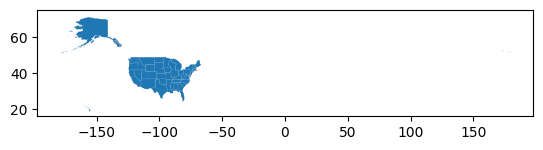

In [ ]:
us_shape.plot()

### Changing CRS to EPSG: 5070 — NAD83 / Conus Albers

In [ ]:
us_shape = us_shape.to_crs("EPSG:9311")

<Axes: >

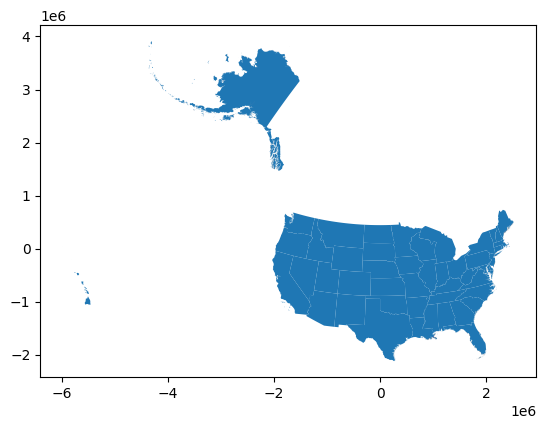

In [ ]:
us_shape.plot()

# JOINING THE DATA

#### Comments:

* Insect data with 53 entries (includes U.S. states + Puerto Rico + Virgin Islands)

* Shapefile with 51 entries (U.S. states + DC, but not Puerto Rico or Virgin Islands)

Solution: Used an inner join to map insect data only where there are geographical shapes. Puerto Rico and Virgin Islands aren't in your shapefile, So, there is no point in keeping them if they can’t be mapped.

In [ ]:
merged_df = pd.merge(insect_data, us_shape, how='inner', left_on='stateProvince', right_on='NAME_1')

In [ ]:
merged_df.head()

year stateProvince  total_richness  total_abundance  Lepidoptera_richness  \
0  1901        Alaska               1                1                   1.0   
1  1901       Arizona               1                1                   1.0   
2  1901    California               4                6                   1.0   
3  1901      Colorado               2                3                   1.0   
4  1901   Connecticut               7                7                   6.0   

   Lepidoptera_abundance  Hymenoptera_richness  Hymenoptera_abundance  \
0                    1.0                   NaN                    NaN   
1                    1.0                   NaN                    NaN   
2                    2.0                   NaN                    NaN   
3                    1.0                   NaN                    NaN   
4                    6.0                   NaN                    NaN   

   Coleoptera_richness  Coleoptera_abundance  ...        COUNTRY       NAME_1  \
0                  NaN                   NaN  ...  United States       Alaska   
1                  NaN                   NaN  ...  United States      Arizona   
2                  3.0                   4.0  ...  United States   California   
3                  1.0                   2.0  ...  United States     Colorado   
4                  1.0                   1.0  ...  United States  Connecticut   

   VARNAME_1  NL_NAME_1  TYPE_1  ENGTYPE_1  CC_1  HASC_1  ISO_1  \
0  AK|Alaska         NA   State      State    NA   US.AK  US-AK   
1   AZ|Ariz.         NA   State      State    NA   US.AZ  US-AZ   
2  CA|Calif.         NA   State      State    NA   US.CA  US-CA   
3   CO|Colo.         NA   State      State    NA   US.CO  US-CO   
4   CT|Conn.         NA   State      State    NA   US.CT  US-CT   

                                            geometry  
0  MULTIPOLYGON (((-4359238.121 3406827.983, -435...  
1  POLYGON ((-1025587.049 -1451956.245, -1027176....  
2  MULTIPOLYGON (((-1606877.592 -1193963.609, -16...  
3  POLYGON ((-512006.847 -871605.799, -520700.025...  
4  MULTIPOLYGON (((2168236.88 -93902.286, 2168205...  

[5 rows x 86 columns]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   year                         4164 non-null   int64   
 1   stateProvince                4164 non-null   object  
 2   total_richness               4164 non-null   int64   
 3   total_abundance              4164 non-null   int64   
 4   Lepidoptera_richness         3868 non-null   float64 
 5   Lepidoptera_abundance        3868 non-null   float64 
 6   Hymenoptera_richness         740 non-null    float64 
 7   Hymenoptera_abundance        740 non-null    float64 
 8   Coleoptera_richness          1020 non-null   float64 
 9   Coleoptera_abundance         1020 non-null   float64 
 10  Diptera_richness             668 non-null    float64 
 11  Diptera_abundance            668 non-null    float64 
 12  Odonata_richness             305 non-null    float64 
 13  Odo

In [ ]:
# nunique stateProvince
merged_df["stateProvince"].nunique()

51

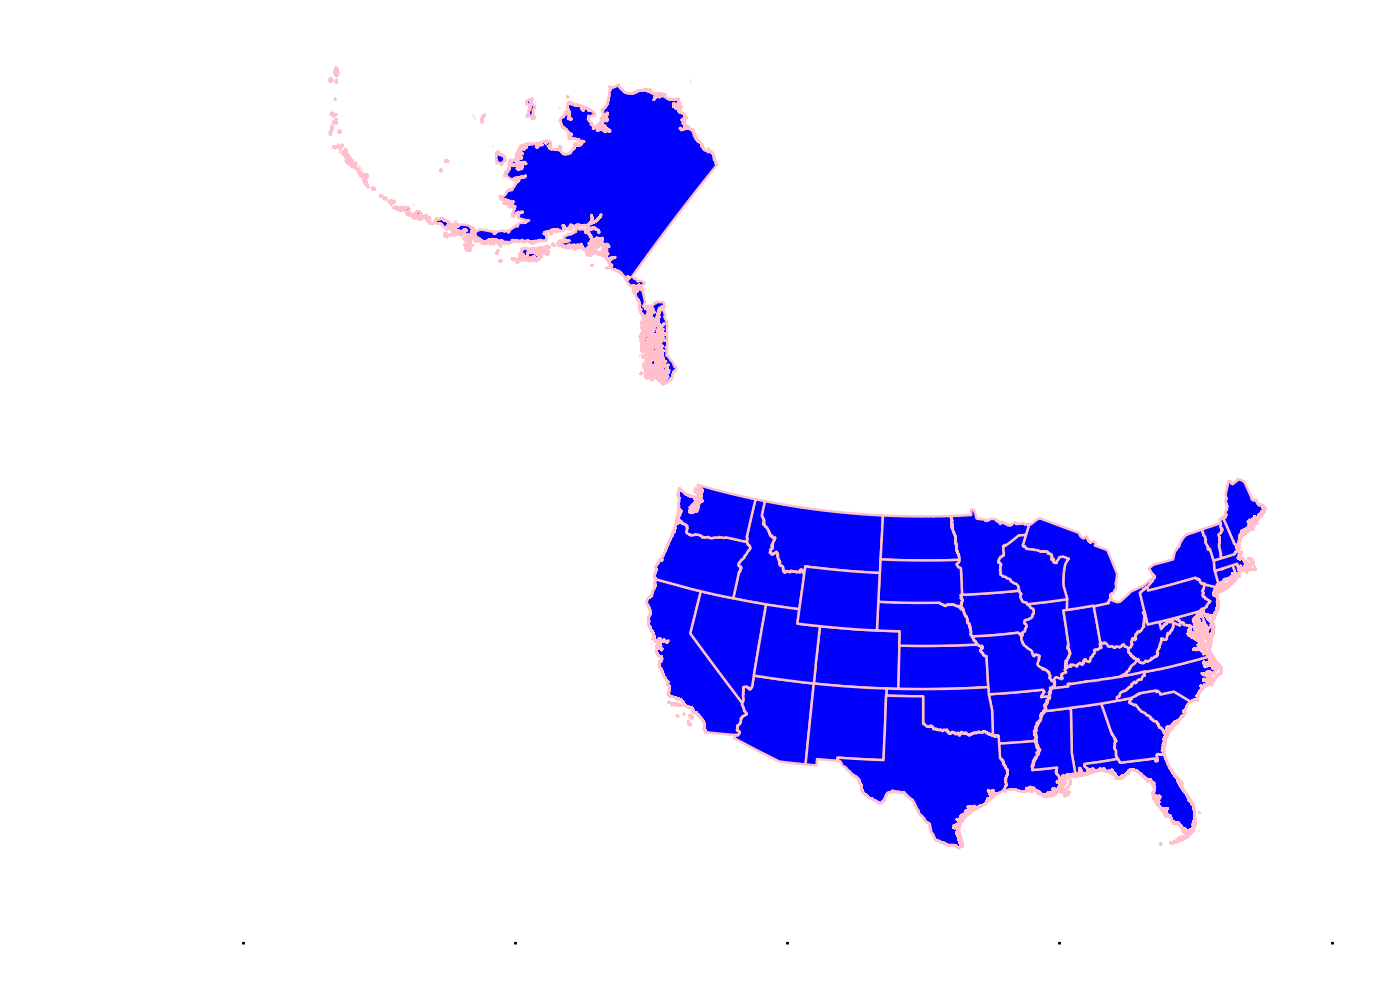

In [ ]:
plotnine.options.figure_size = (7, 5)


(
 ggplot()
  + geom_map(us_shape, fill='blue', color='pink')
  + xlim(-5e6,3e6)
  + ylim(-2.5e6, 4e6)
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
 )

# PLOTTING

N.B: Having issues with plotnine (because of no X and Y for polygons and geometries)

In [ ]:
plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(us_shape, aes(geometry = 'geometry', fill='ALAND'), color='white')
  + xlim(-5e6,3e6)
  + ylim(-2.5e6, 4e6)
  + labs(fill='Land Area (sq m)')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

PlotnineError: "Could not evaluate the 'fill' mapping: 'ALAND' (original error: name 'ALAND' is not defined)"

## 1) Total Richness by State

In [ ]:
ggplot(merged_df, aes(x='x', y='y', group='NAME_1', fill='total_richness'))


PlotnineError: "Could not evaluate the 'x' mapping: 'x' (original error: name 'x' is not defined)"

# USING A NEW DATA SOURCE FOR THE SHAPEFILE

US State Boundaries from US Census Bureau: https://github.com/envirodatascience/ENVS-617-Class-Data/raw/main/tl_2020_us_state.zip

In [ ]:
# ! wget https://github.com/envirodatascience/ENVS-617-Class-Data/raw/main/tl_2020_us_state.zip

--2025-04-09 22:06:48--  https://github.com/envirodatascience/ENVS-617-Class-Data/raw/main/tl_2020_us_state.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/tl_2020_us_state.zip [following]
--2025-04-09 22:06:49--  https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/tl_2020_us_state.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9757887 (9.3M) [application/zip]
Saving to: ‘tl_2020_us_state.zip.1’

tl_2020_us_state.zi 100%[===================>]   9.31M  23.1MB/s    in 0.4s    

2025-04-09 22:06:53 (23.1 MB/s) - ‘tl_2020

In [ ]:
! unzip tl_2020_us_state.zip

Archive:  tl_2020_us_state.zip
replace tl_2020_us_state.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
shape = "tl_2020_us_state.shp"
df_states = gpd.read_file(shape)

In [ ]:
df_states.head()

REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A   62266296765    489206049  +38.6472854  -080.6183274   
1        A  138958484319  45975808217  +28.3989775  -082.5143005   
2        A  143778461053   6216594318  +40.1028754  -089.1526108   
3        A  206232157570  18949864226  +46.3159573  -094.1996043   
4        A   25151895765   6979171386  +38.9466584  -076.6744939   

                                            geometry  
0  POLYGON ((-81.74725 39.09538, -81.74635 39.096...  
1  MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...  
2  POLYGON ((-91.1853 40.6378, -91.1751 40.64303,...  
3  POLYGON ((-96.78438 46.6305, -96.78434 46.6305...  
4  POLYGON ((-77.45881 39.22027, -77.45866 39.220...

In [ ]:
df_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    56 non-null     object  
 1   DIVISION  56 non-null     object  
 2   STATEFP   56 non-null     object  
 3   STATENS   56 non-null     object  
 4   GEOID     56 non-null     object  
 5   STUSPS    56 non-null     object  
 6   NAME      56 non-null     object  
 7   LSAD      56 non-null     object  
 8   MTFCC     56 non-null     object  
 9   FUNCSTAT  56 non-null     object  
 10  ALAND     56 non-null     int64   
 11  AWATER    56 non-null     int64   
 12  INTPTLAT  56 non-null     object  
 13  INTPTLON  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB


In [ ]:
df_states = df_states.to_crs("EPSG:9311")

<Axes: >

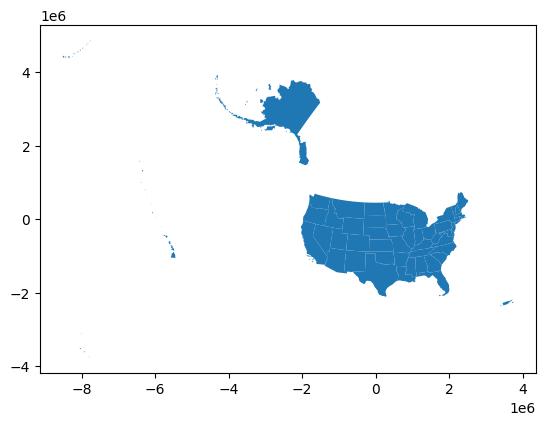

In [ ]:
df_states.plot()

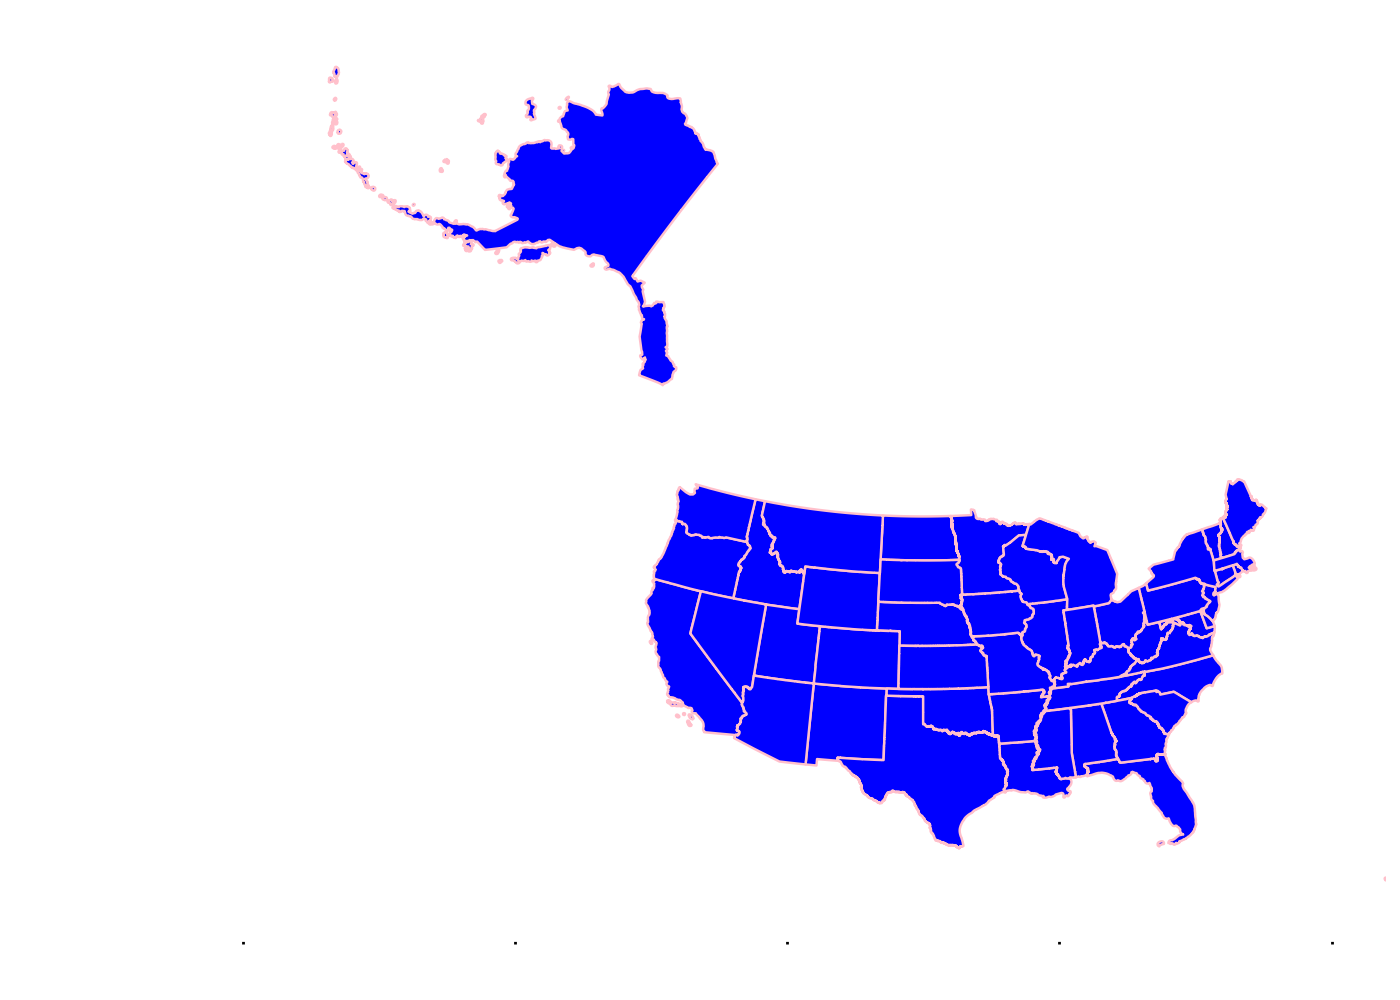

In [ ]:
plotnine.options.figure_size = (7, 5)


(
 ggplot()
  + geom_map(df_states, fill='blue', color='pink')
  + xlim(-5e6,3e6)
  + ylim(-2.5e6, 4e6)
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
 )

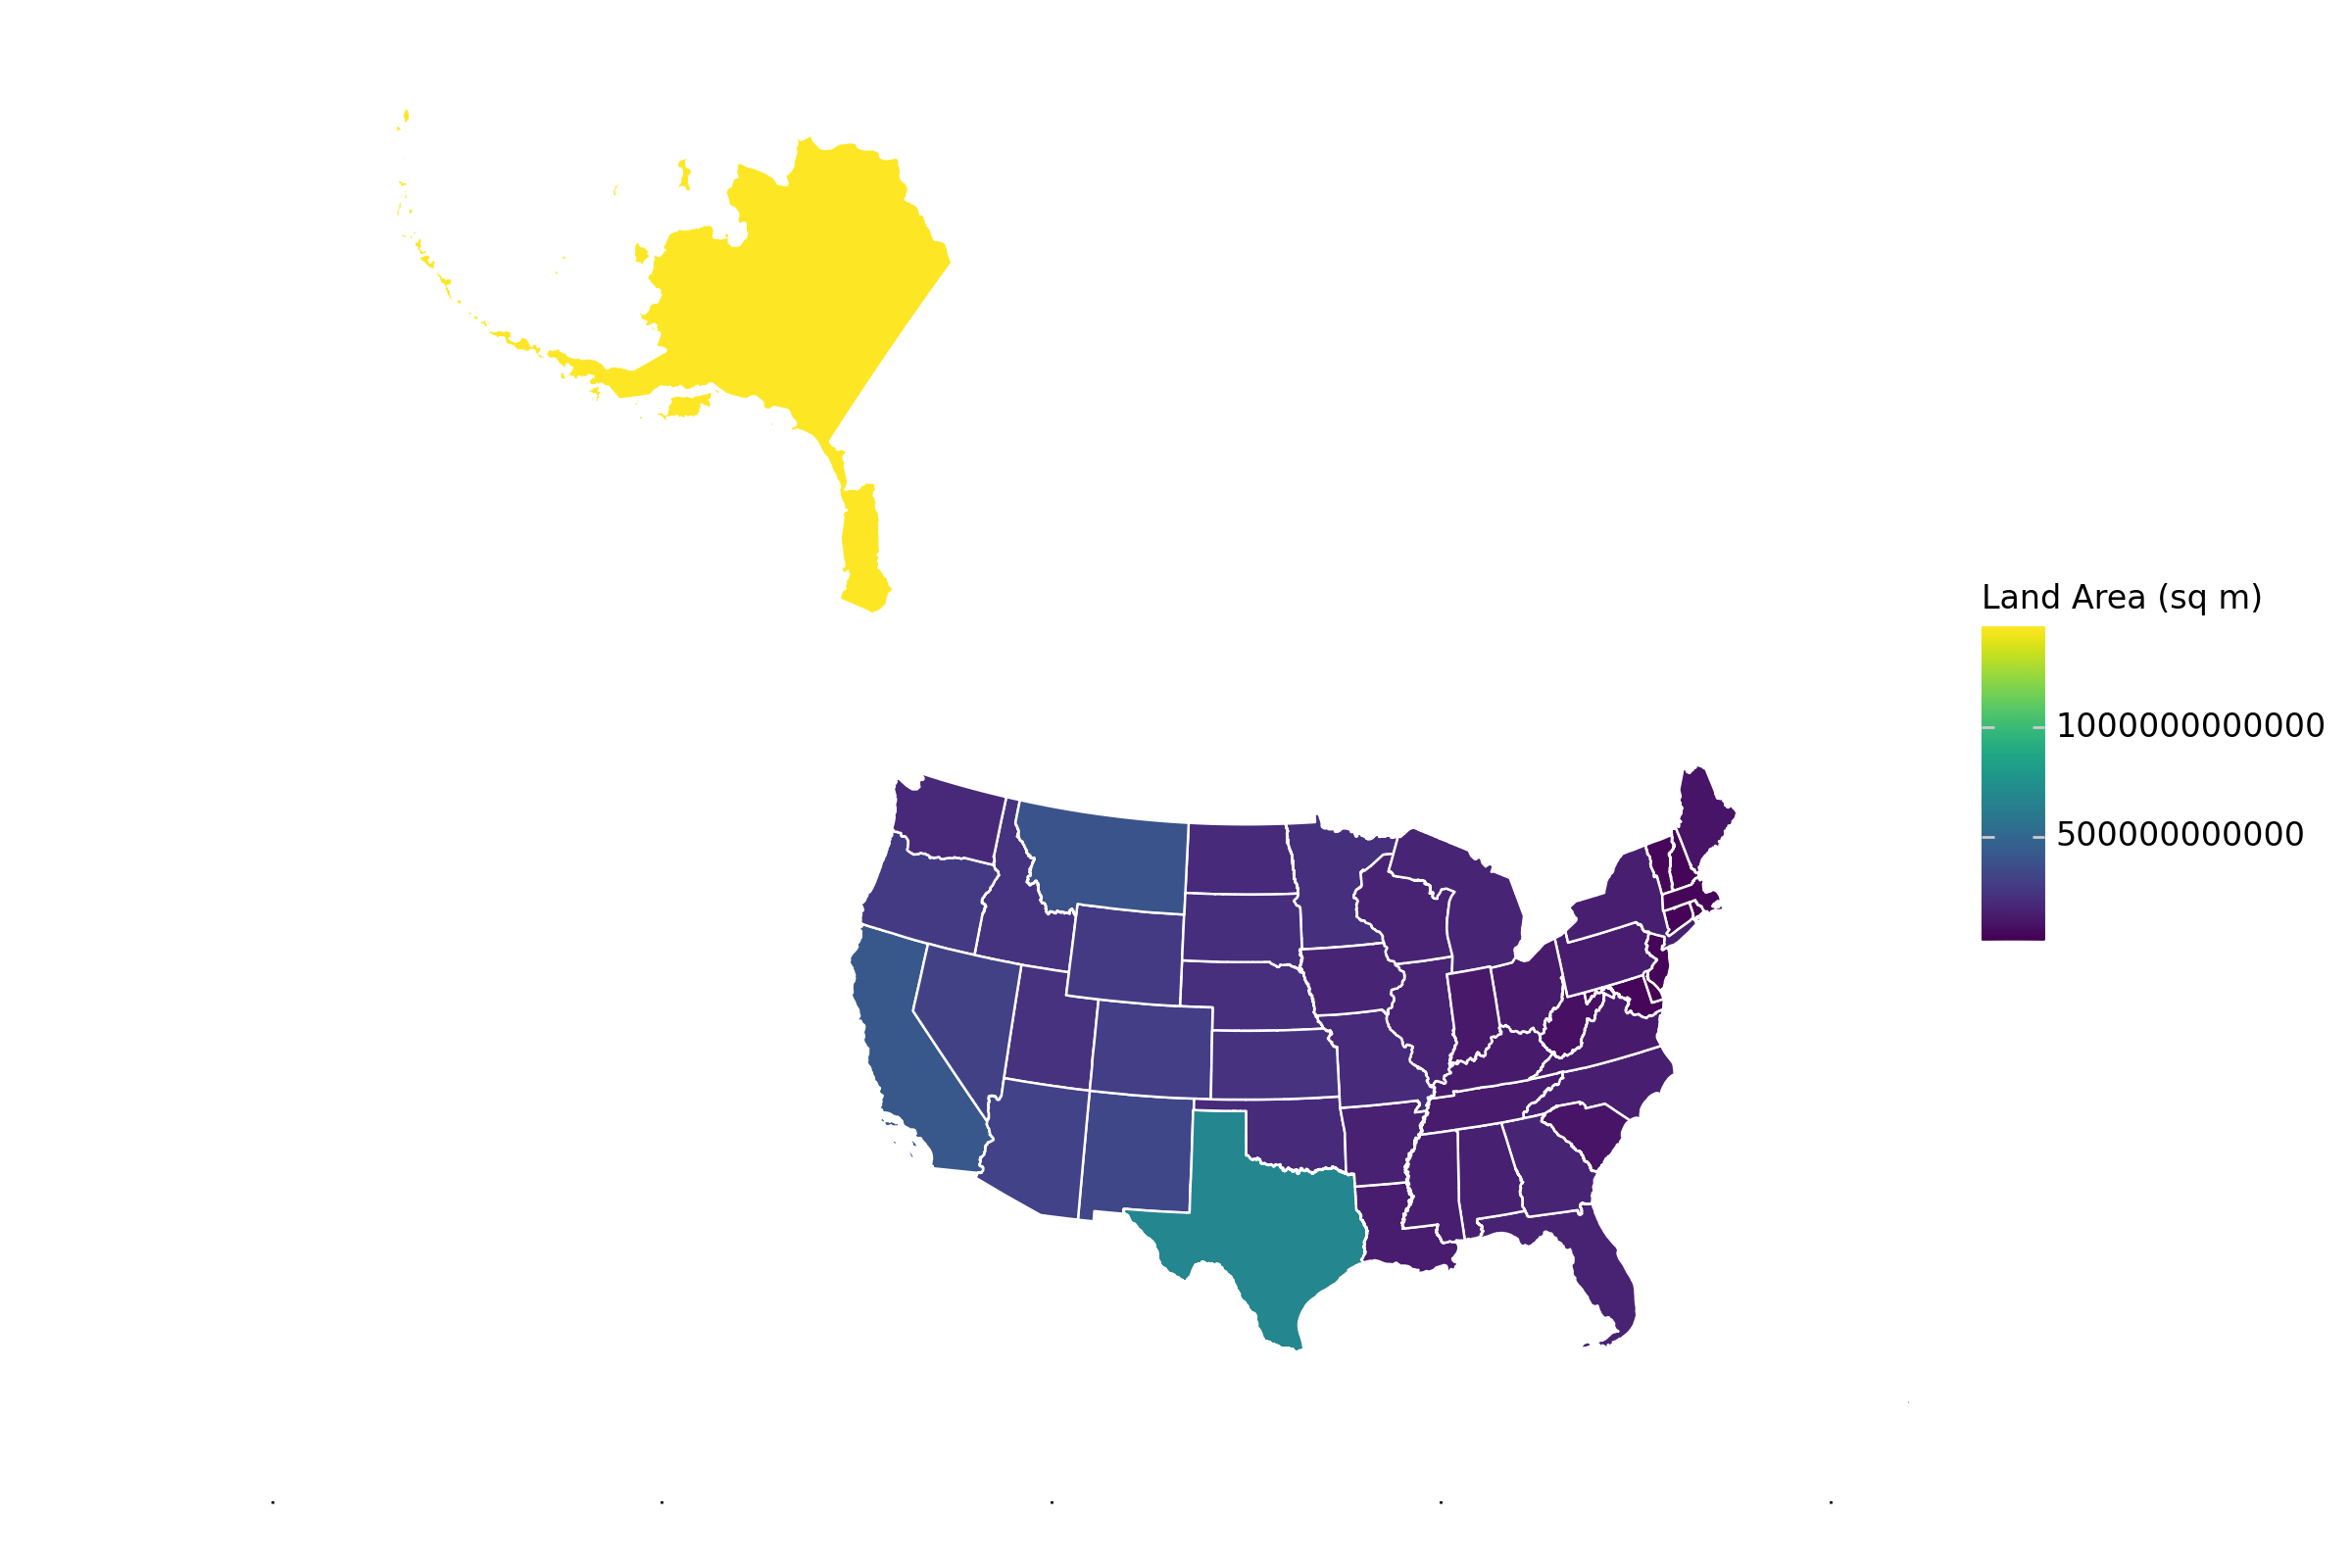

In [ ]:
plotnine.options.figure_size = (12, 8)


(ggplot()
  + geom_map(df_states, aes(geometry = 'geometry', fill='ALAND'), color='white')
  + xlim(-5e6,3e6)
  + ylim(-2.5e6, 4e6)
  + labs(fill='Land Area (sq m)')
  + theme_classic()
  + theme(axis_line=element_line(color="white"),
          axis_ticks=element_line(color = "white"),
          axis_text=element_line(color='white'),
          text=element_text(size = 12))
  # + xlab("")
  # + ylab("")
 )

In [ ]:
# Currently, interior points are in degrees (original CRS)
# Recalculate for new crs
df_states['INTPTLAT_9311'] = df_states.geometry.centroid.y
df_states['INTPTLON_9311'] = df_states.geometry.centroid.x

# Intptlat and Intplotn = Longtitude and Latitude

In [ ]:
df_states.head()

REGION DIVISION STATEFP   STATENS GEOID STUSPS           NAME LSAD  MTFCC  \
0      3        5      54  01779805    54     WV  West Virginia   00  G4000   
1      3        5      12  00294478    12     FL        Florida   00  G4000   
2      2        3      17  01779784    17     IL       Illinois   00  G4000   
3      2        4      27  00662849    27     MN      Minnesota   00  G4000   
4      3        5      24  01714934    24     MD       Maryland   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A   62266296765    489206049  +38.6472854  -080.6183274   
1        A  138958484319  45975808217  +28.3989775  -082.5143005   
2        A  143778461053   6216594318  +40.1028754  -089.1526108   
3        A  206232157570  18949864226  +46.3159573  -094.1996043   
4        A   25151895765   6979171386  +38.9466584  -076.6744939   

                                            geometry  INTPTLAT_9311  \
0  POLYGON ((1561558.361 -483485.662, 1561606.21 ...  -5.110766e+05   
1  MULTIPOLYGON (((1310995.289 -1534804.857, 1310...  -1.665232e+06   
2  POLYGON ((742575.822 -445238.175, 743371.008 -...  -4.841209e+05   
3  POLYGON ((245506.302 186208.841, 245509.56 186...   1.622891e+05   
4  POLYGON ((1914680.218 -379447.014, 1914685.665...  -3.906086e+05   

   INTPTLON_9311  
0   1.666466e+06  
1   1.715074e+06  
2   9.202084e+05  
3   4.449371e+05  
4   1.986723e+06

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 6 rows containing missing values.


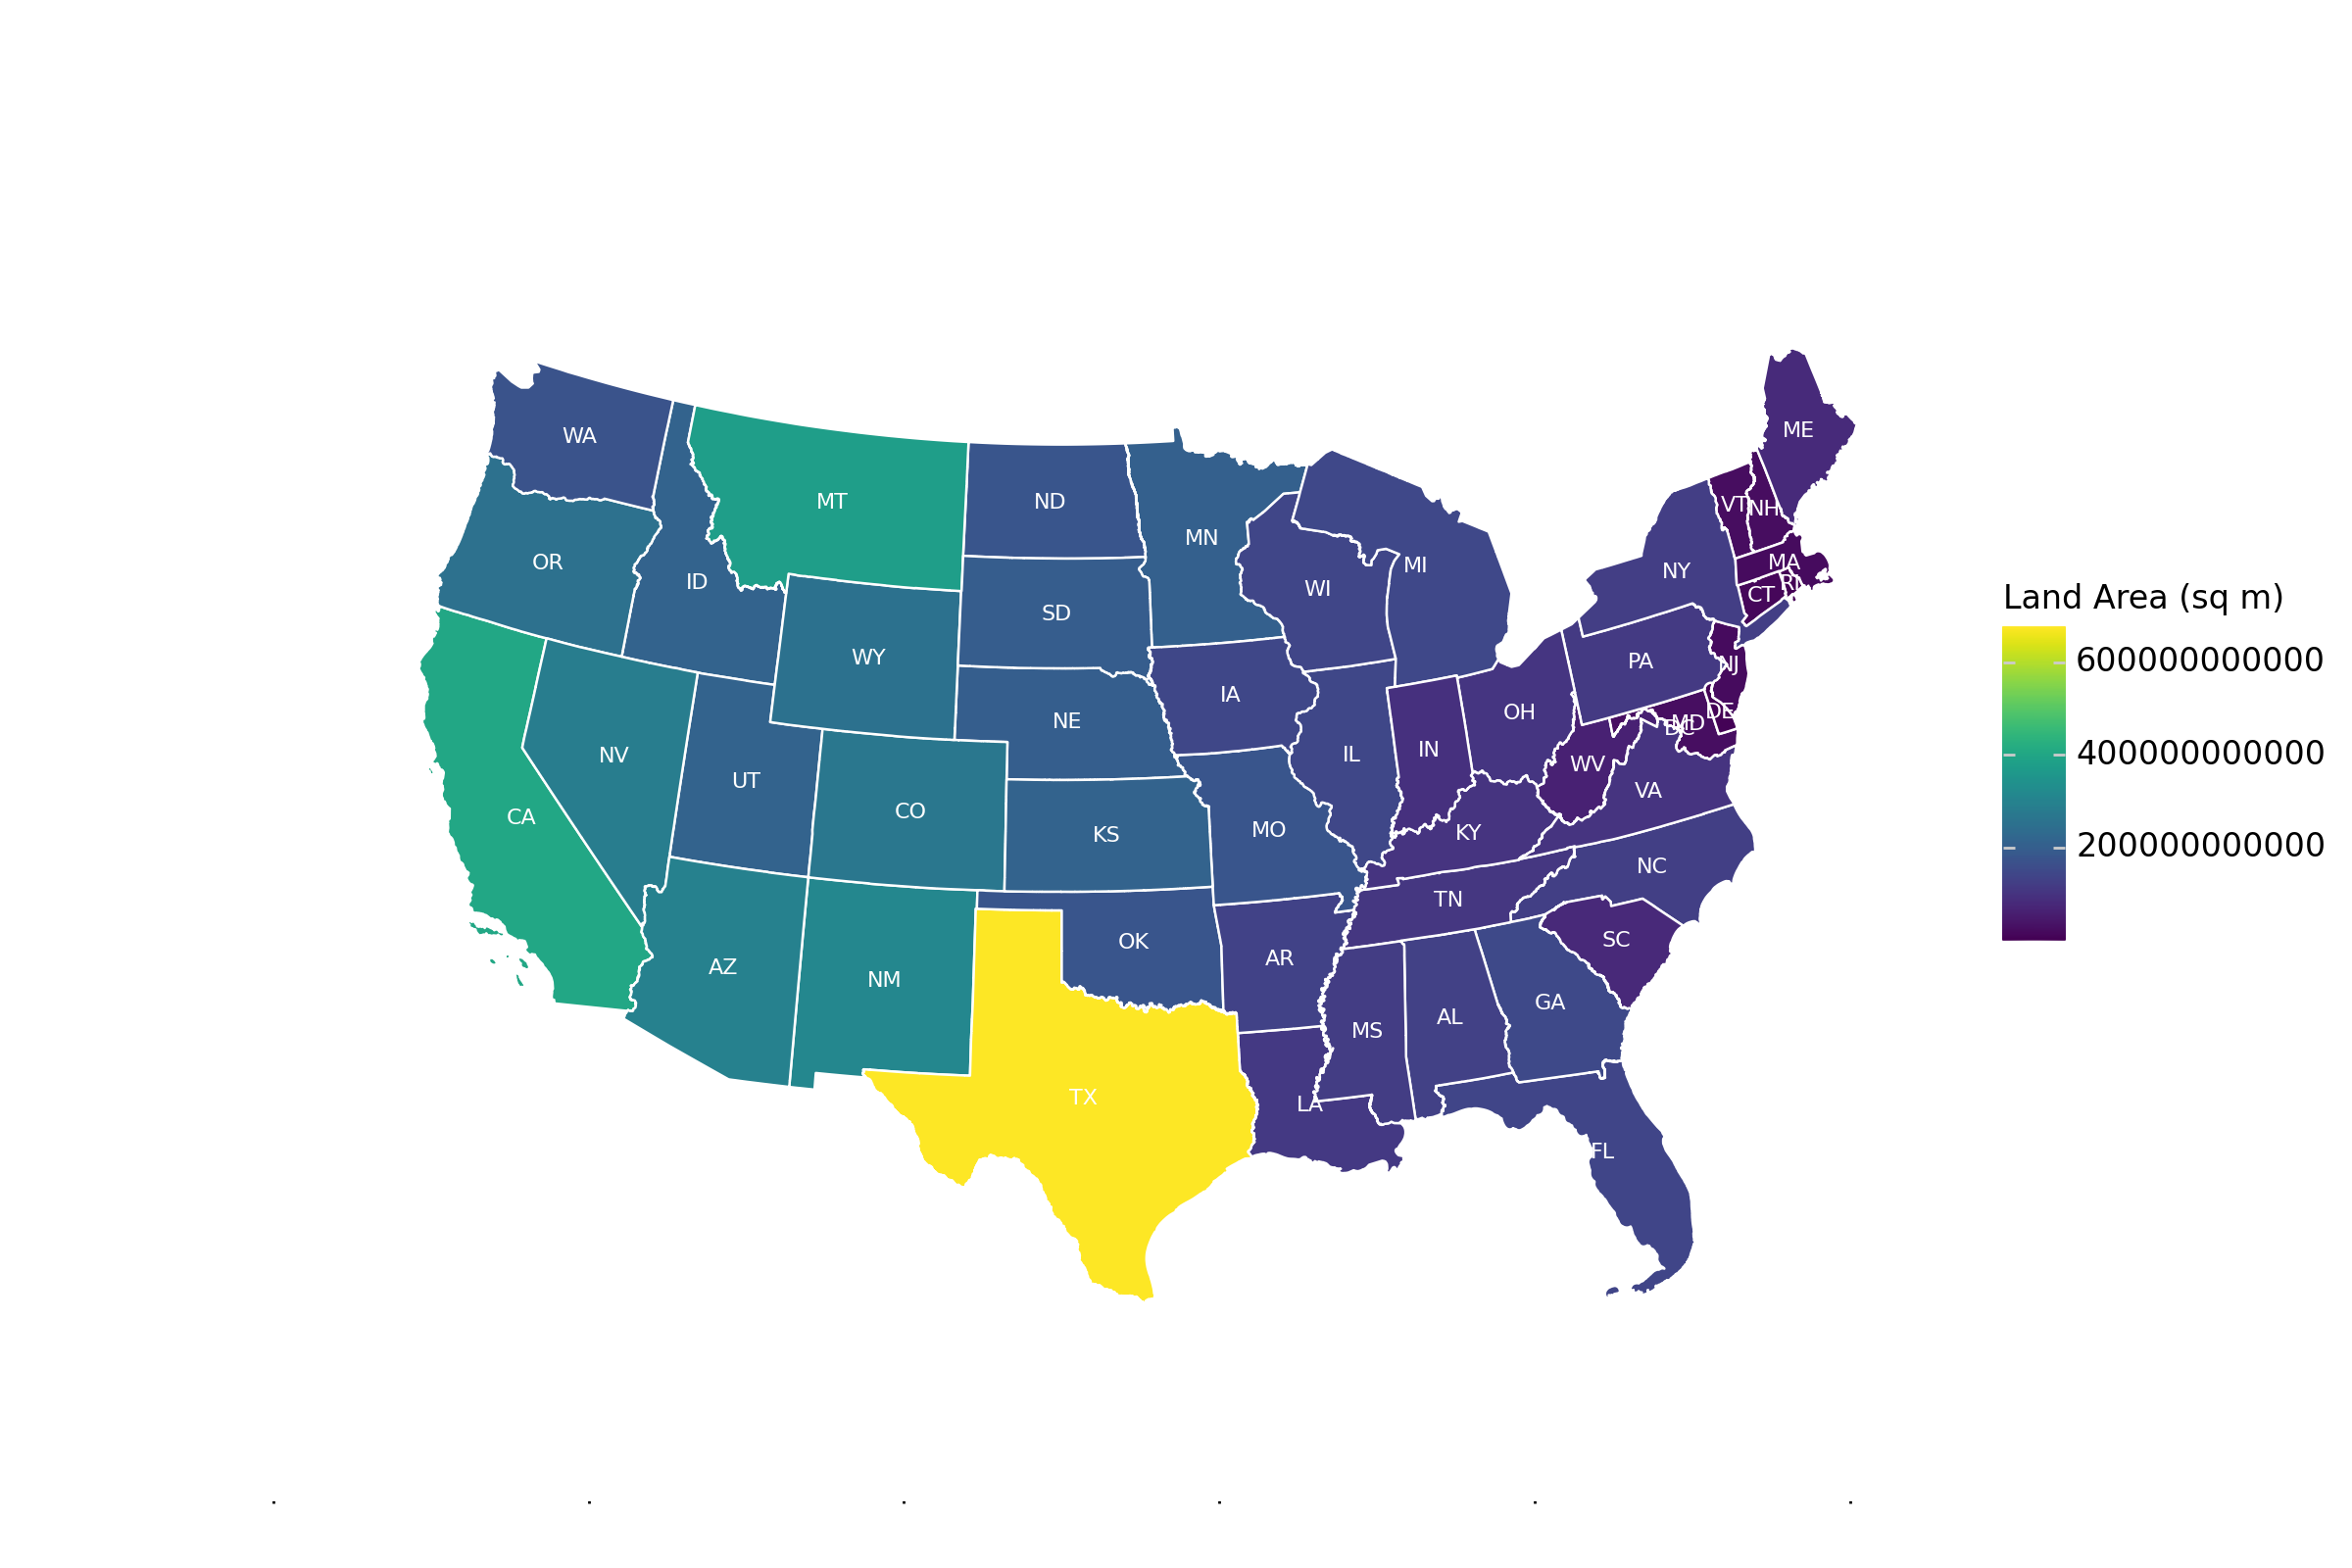

In [ ]:
plotnine.options.figure_size = (12, 8)

(
  ggplot()
    + geom_map(df_states[df_states.STUSPS != 'AK'], aes(fill='ALAND'), color='white')
    + geom_text(df_states[df_states.STUSPS != 'AK'], aes(x='INTPTLON_9311', y='INTPTLAT_9311', label='STUSPS'), color='white', size=8)
  + xlim(-2.5e6,2.5e6)
  + ylim(-2.5e6, 1.5e6)
    + labs(fill='Land Area (sq m)')
    + theme_classic()
    + theme(axis_line=element_line(color="white"),
            axis_ticks=element_line(color = "white"), # further adjusts theme_classic() - axis ticks white
            axis_text=element_line(color='white'),
            text=element_text(size = 12)) # further adjusts theme_classic() - sets font size for whole chart
    + xlab("")
    + ylab("")
 )

In [ ]:
# unique NAME
df_states["NAME"].unique()

array(['West Virginia', 'Florida', 'Illinois', 'Minnesota', 'Maryland',
       'Rhode Island', 'Idaho', 'New Hampshire', 'North Carolina',
       'Vermont', 'Connecticut', 'Delaware', 'New Mexico', 'California',
       'New Jersey', 'Wisconsin', 'Oregon', 'Nebraska', 'Pennsylvania',
       'Washington', 'Louisiana', 'Georgia', 'Alabama', 'Utah', 'Ohio',
       'Texas', 'Colorado', 'South Carolina', 'Oklahoma', 'Tennessee',
       'Wyoming', 'Hawaii', 'North Dakota', 'Kentucky',
       'United States Virgin Islands',
       'Commonwealth of the Northern Mariana Islands', 'Guam', 'Maine',
       'New York', 'Nevada', 'Alaska', 'American Samoa', 'Michigan',
       'Arkansas', 'Mississippi', 'Missouri', 'Montana', 'Kansas',
       'Indiana', 'Puerto Rico', 'South Dakota', 'Massachusetts',
       'Virginia', 'District of Columbia', 'Iowa', 'Arizona'],
      dtype=object)

In [ ]:
# nunique NAME
df_states["NAME"].nunique()

56

# MERGING

In [ ]:
merged_data = pd.merge(insect_data, df_states, how='left', left_on='stateProvince', right_on='NAME')

In [ ]:
merged_data.head()

year stateProvince  total_richness  total_abundance  Lepidoptera_richness  \
0  1901        Alaska               1                1                   1.0   
1  1901       Arizona               1                1                   1.0   
2  1901    California               4                6                   1.0   
3  1901      Colorado               2                3                   1.0   
4  1901   Connecticut               7                7                   6.0   

   Lepidoptera_abundance  Hymenoptera_richness  Hymenoptera_abundance  \
0                    1.0                   NaN                    NaN   
1                    1.0                   NaN                    NaN   
2                    2.0                   NaN                    NaN   
3                    1.0                   NaN                    NaN   
4                    6.0                   NaN                    NaN   

   Coleoptera_richness  Coleoptera_abundance  ...  LSAD  MTFCC  FUNCSTAT  \
0                  NaN                   NaN  ...    00  G4000         A   
1                  NaN                   NaN  ...    00  G4000         A   
2                  3.0                   4.0  ...    00  G4000         A   
3                  1.0                   2.0  ...    00  G4000         A   
4                  1.0                   1.0  ...    00  G4000         A   

          ALAND        AWATER     INTPTLAT      INTPTLON  \
0  1.478941e+12  2.453802e+11  +63.3473560  -152.8397334   
1  2.943610e+11  8.588533e+08  +34.2039362  -111.6063449   
2  4.036712e+11  2.029413e+10  +37.1551773  -119.5434183   
3  2.684187e+11  1.185766e+09  +38.9937669  -105.5087122   
4  1.254169e+10  1.816426e+09  +41.5798637  -072.7466572   

                                            geometry  INTPTLAT_9311  \
0  MULTIPOLYGON (((-2996338.494 3218001.01, -2996...   2.935005e+06   
1  POLYGON ((-1352675.805 -1213409.363, -1352687....  -1.116818e+06   
2  MULTIPOLYGON (((-1976113.896 -98951.979, -1976...  -6.696154e+05   
3  POLYGON ((-767148.887 -489022.412, -767062.794...  -6.509685e+05   
4  POLYGON ((2153173.583 -17591.487, 2153172.248 ...  -6.392046e+03   

   INTPTLON_9311  
0  -2.371999e+06  
1  -1.071543e+06  
2  -1.713224e+06  
3  -4.794695e+05  
4   2.216779e+06  

[5 rows x 91 columns]

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   year                         4175 non-null   int64   
 1   stateProvince                4175 non-null   object  
 2   total_richness               4175 non-null   int64   
 3   total_abundance              4175 non-null   int64   
 4   Lepidoptera_richness         3872 non-null   float64 
 5   Lepidoptera_abundance        3872 non-null   float64 
 6   Hymenoptera_richness         741 non-null    float64 
 7   Hymenoptera_abundance        741 non-null    float64 
 8   Coleoptera_richness          1021 non-null   float64 
 9   Coleoptera_abundance         1021 non-null   float64 
 10  Diptera_richness             668 non-null    float64 
 11  Diptera_abundance            668 non-null    float64 
 12  Odonata_richness             305 non-null    float64 
 13  Odo

In [ ]:
state_richness = merged_data.groupby('stateProvince', as_index=False)['total_richness'].mean()


In [ ]:
state_richness.head(50)

stateProvince  total_richness
0                Alabama        4.081081
1                 Alaska        4.245283
2                Arizona       26.061947
3               Arkansas        3.297872
4             California       63.474576
5               Colorado       43.704762
6            Connecticut      165.540323
7               Delaware        6.612500
8   District of Columbia        3.062500
9                Florida       39.750000
10               Georgia        7.494505
11                Hawaii        4.250000
12                 Idaho        7.475000
13              Illinois       12.656566
14               Indiana        9.314607
15                  Iowa        1.848485
16                Kansas       14.569620
17              Kentucky        3.744186
18             Louisiana        6.019608
19                 Maine       19.871795
20              Maryland        7.570000
21         Massachusetts       62.186992
22              Michigan       10.873684
23             Minnesota        4.490566
24           Mississippi       11.265625
25              Missouri       12.447619
26               Montana       19.173333
27              Nebraska        4.196721
28                Nevada        9.696429
29         New Hampshire       43.068376
30            New Jersey       70.245763
31            New Mexico        6.846154
32              New York       37.033613
33        North Carolina       20.085714
34          North Dakota        5.034483
35                  Ohio       15.445652
36              Oklahoma        4.529412
37                Oregon       13.706522
38          Pennsylvania       37.033898
39           Puerto Rico       13.000000
40          Rhode Island       14.172414
41        South Carolina       21.129870
42          South Dakota       13.150943
43             Tennessee        4.229167
44                 Texas       17.126126
45                  Utah        6.346154
46               Vermont        8.079545
47        Virgin Islands        4.000000
48              Virginia       14.377358
49            Washington       14.103093

In [ ]:
map_data = pd.merge(
    state_richness,
    merged_data[['stateProvince', 'geometry']],
    on='stateProvince',
    how='left'
).drop_duplicates('stateProvince')


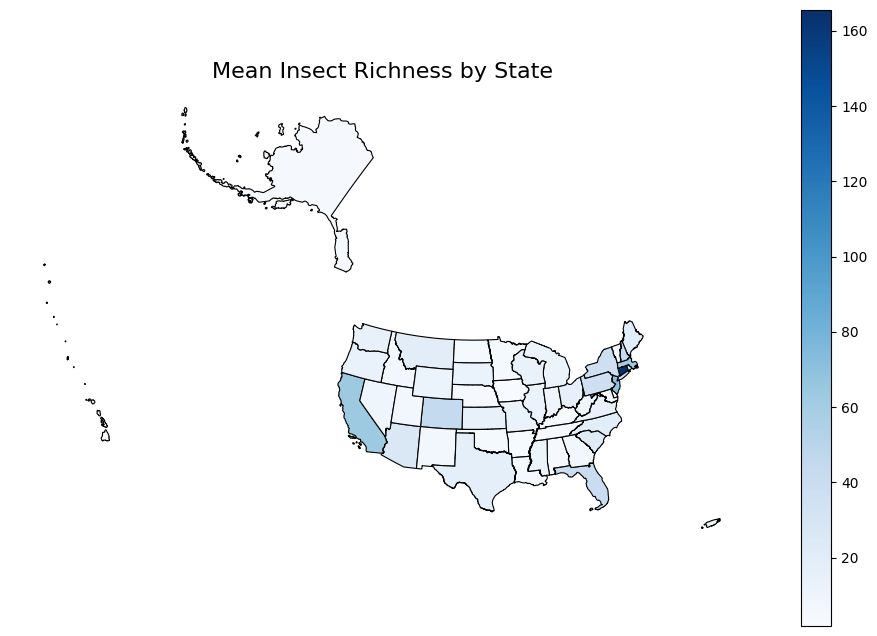

In [ ]:
import matplotlib.pyplot as plt

# Group by stateProvince and aggregate richness (if needed)
state_richness = merged_data.groupby('stateProvince')[['total_richness']].mean().reset_index()

# Merge with geometry to make it plottable
map_df = pd.merge(state_richness, merged_data[['stateProvince', 'geometry']], on='stateProvince', how='left').drop_duplicates(subset='stateProvince')

# Convert to GeoDataFrame if needed
import geopandas as gpd
map_gdf = gpd.GeoDataFrame(map_df, geometry='geometry')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
map_gdf.plot(column='total_richness', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
ax.set_title('Mean Insect Richness by State', fontsize=16)
ax.axis('off')
plt.show()


In [ ]:
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd

def gdf_to_plotnine_df(gdf, group_col='stateProvince', value_col='total_richness'):
    rows = []

    for _, row in gdf.iterrows():
        geom = row['geometry']
        if isinstance(geom, Polygon):
            geoms = [geom]
        elif isinstance(geom, MultiPolygon):
            geoms = list(geom.geoms)
        else:
            continue  # skip weird geometries

        for poly in geoms:
            x, y = poly.exterior.xy
            df = pd.DataFrame({
                'x': x,
                'y': y,
                group_col: row[group_col],
                value_col: row[value_col]
            })
            rows.append(df)

    return pd.concat(rows, ignore_index=True)

# Convert
plot_df = gdf_to_plotnine_df(map_data)


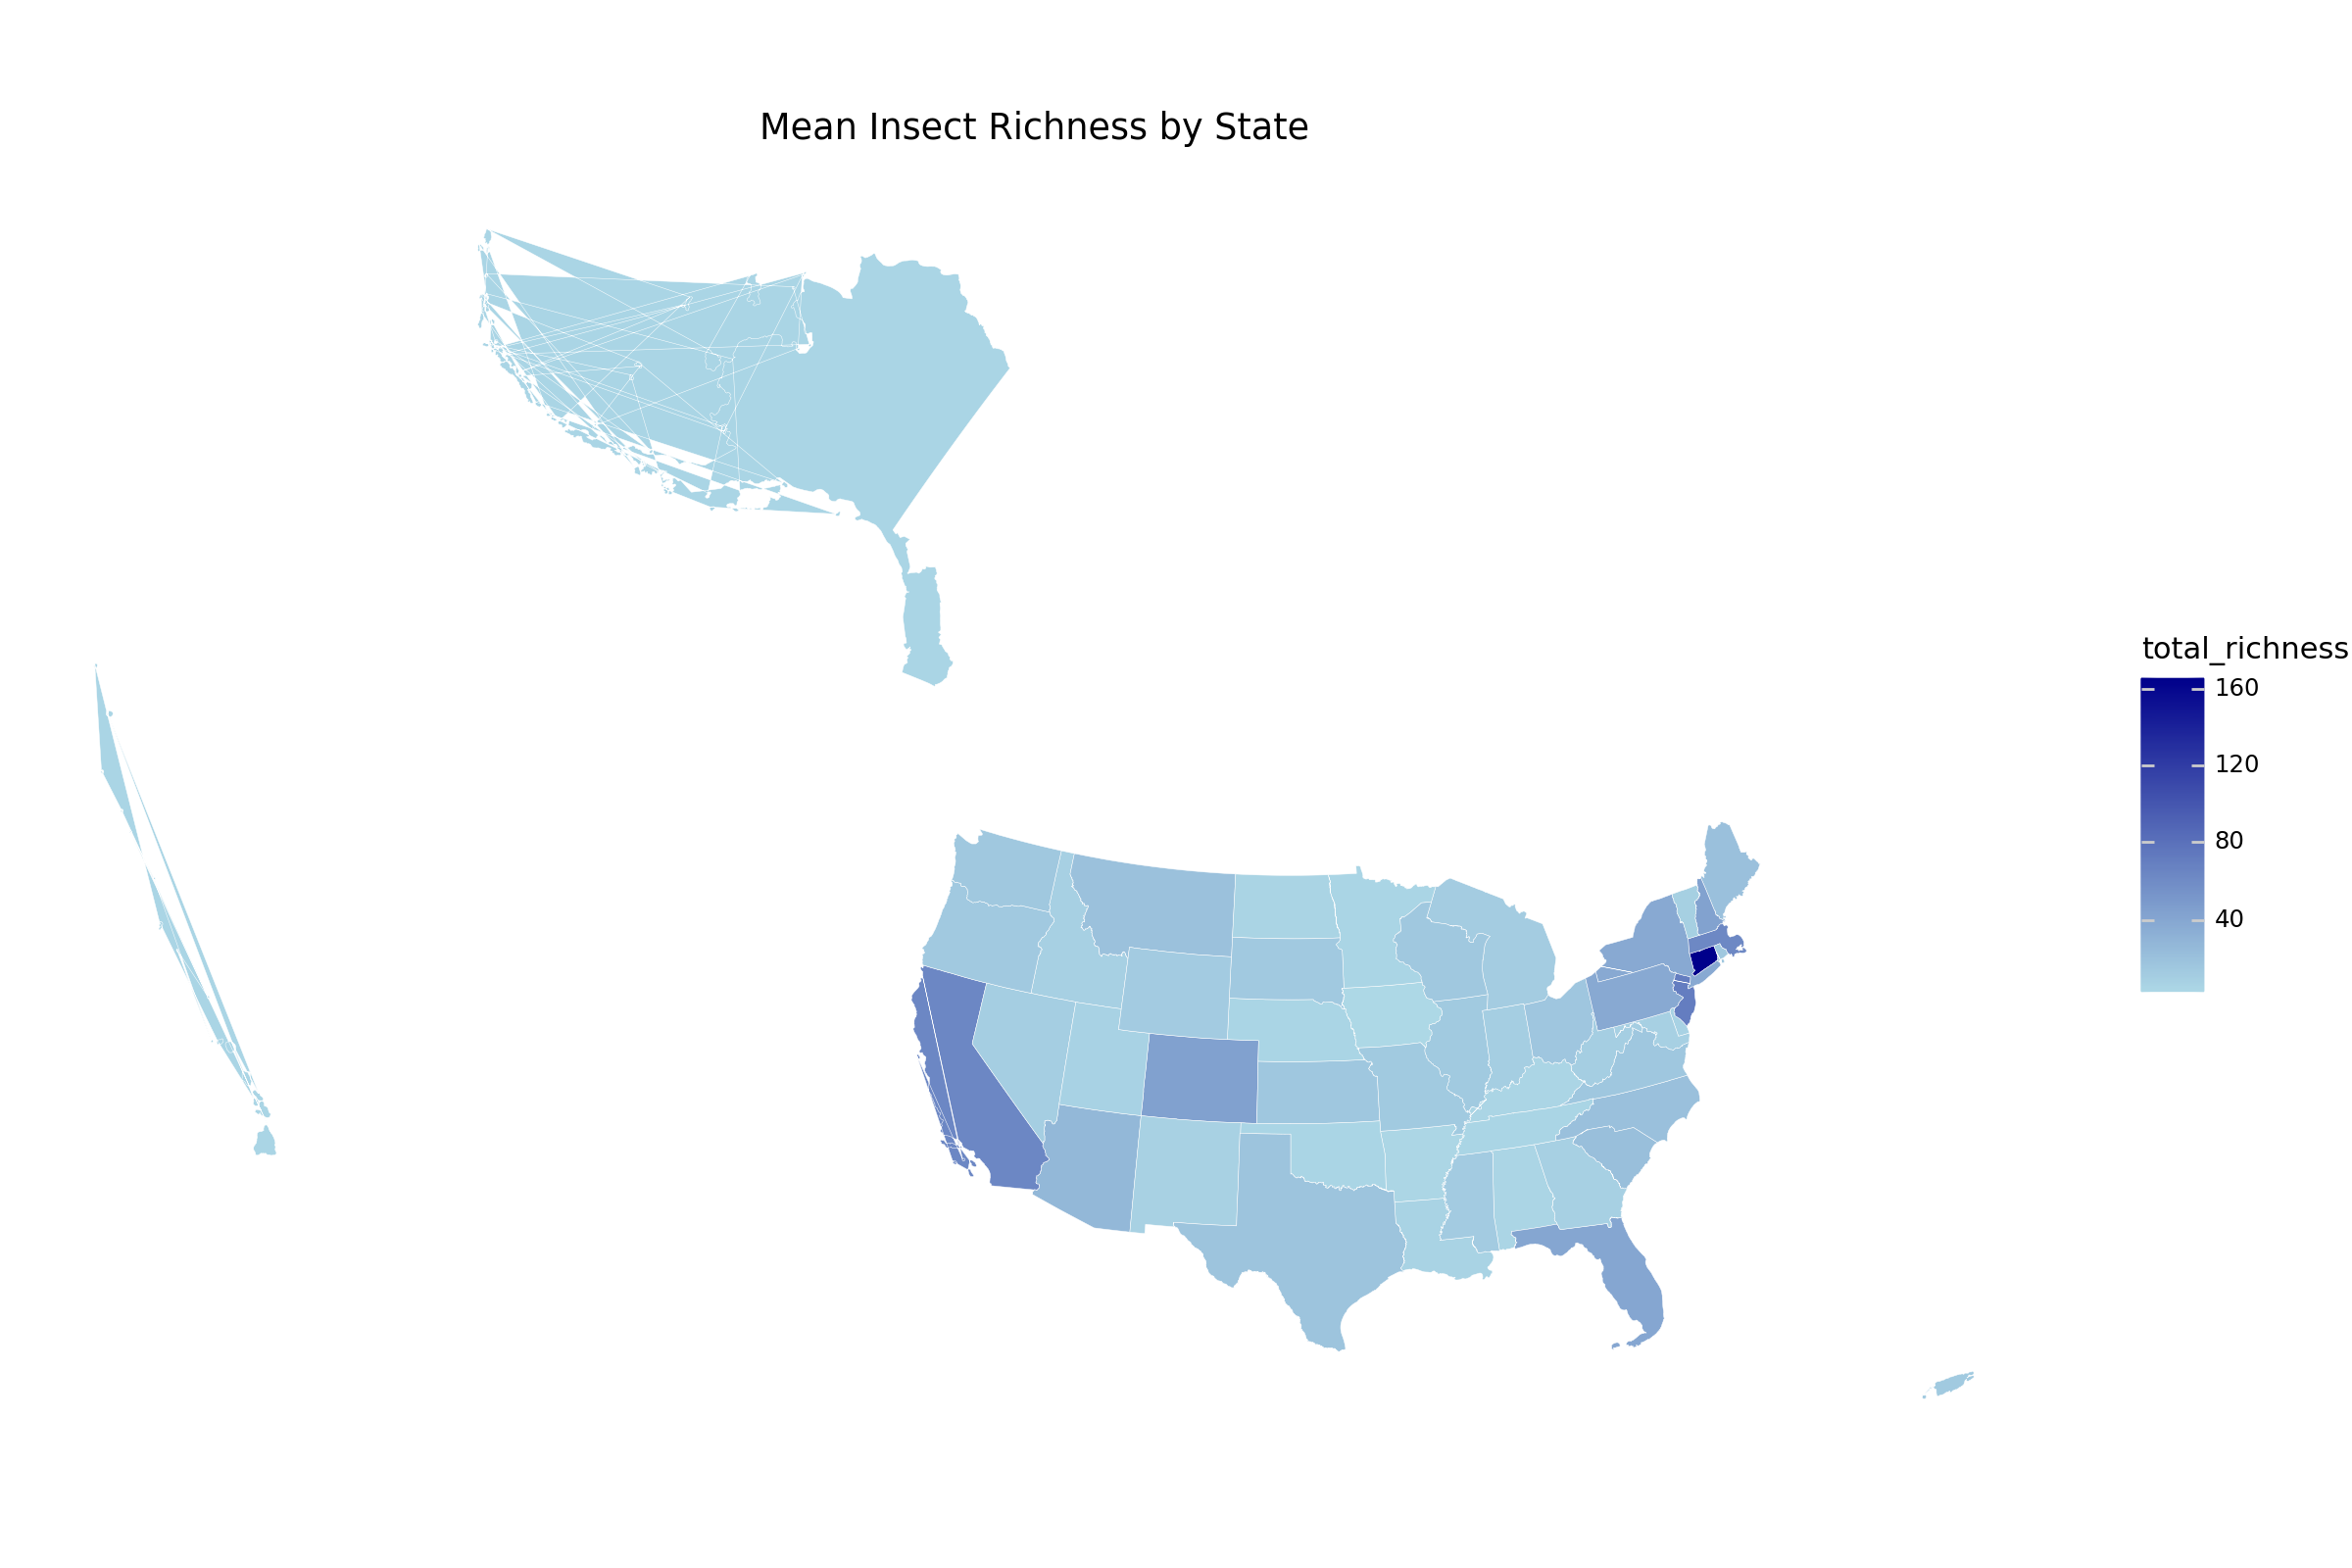

In [ ]:
from plotnine import *

ggplot(plot_df) + \
    geom_polygon(
        aes(x='x', y='y', group='stateProvince', fill='total_richness'),
        color='white', size=0.1
    ) + \
    coord_equal() + \
    scale_fill_gradient(low='lightblue', high='darkblue') + \
    labs(title='Mean Insect Richness by State') + \
    theme_void() + \
    theme(figure_size=(12, 8))


## Mapping total abundance

In [ ]:
state_Nymphalidae  = merged_data.groupby('stateProvince', as_index=False)['Nymphalidae_richness'].mean()

In [ ]:
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
nymph_map = pd.merge(state_Nymphalidae, geometry_map, on='stateProvince', how='left')

In [ ]:
nymph_gdf = gpd.GeoDataFrame(nymph_map, geometry='geometry')

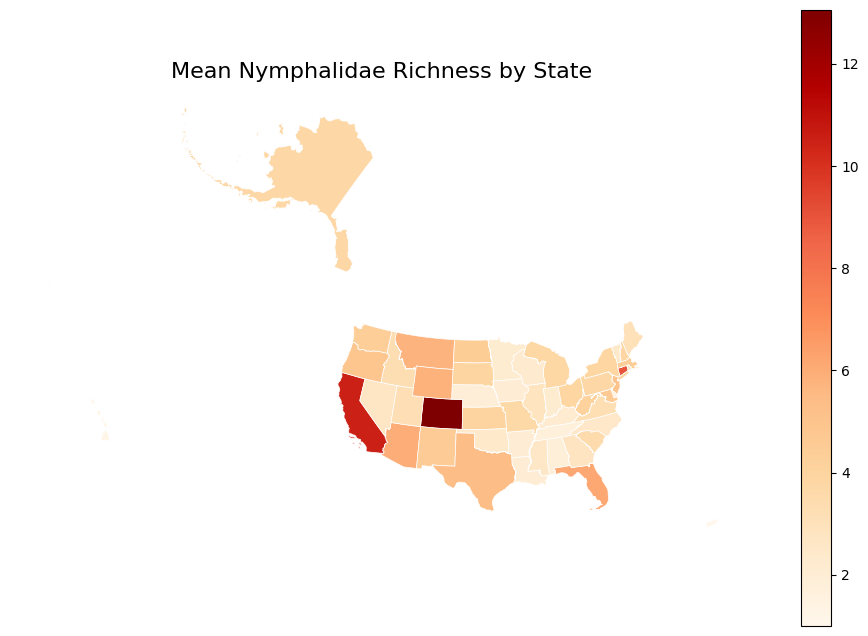

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
nymph_gdf.plot(
    column='Nymphalidae_richness',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Mean Nymphalidae Richness by State', fontsize=16)
ax.axis('off')
plt.show()

## **Mapping Nymph_abundance**

In [ ]:
state_nymph_abund = merged_data.groupby('stateProvince', as_index=False)['Nymphalidae_abundance'].mean()
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
nymph_abund_map = pd.merge(state_nymph_abund, geometry_map, on='stateProvince', how='left')

nymph_abund_gdf = gpd.GeoDataFrame(nymph_abund_map, geometry='geometry')

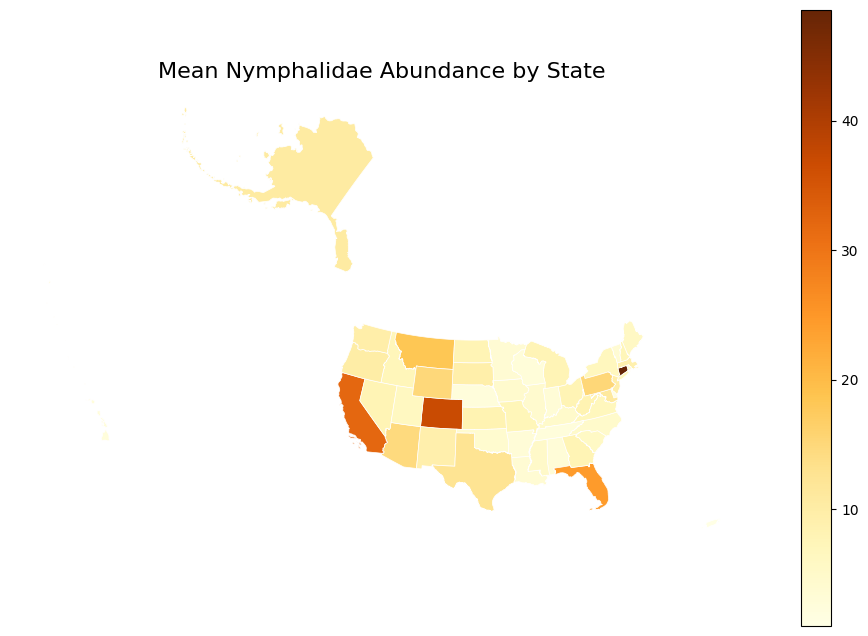

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
nymph_abund_gdf.plot(
    column='Nymphalidae_abundance',
    cmap='YlOrBr',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Mean Nymphalidae Abundance by State', fontsize=16)
ax.axis('off')
plt.show()


## Map total_abundance by State

In [ ]:
state_abund = merged_data.groupby('stateProvince', as_index=False)['total_abundance'].mean()
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
abund_map = pd.merge(state_abund, geometry_map, on='stateProvince', how='left')

abund_gdf = gpd.GeoDataFrame(abund_map, geometry='geometry')


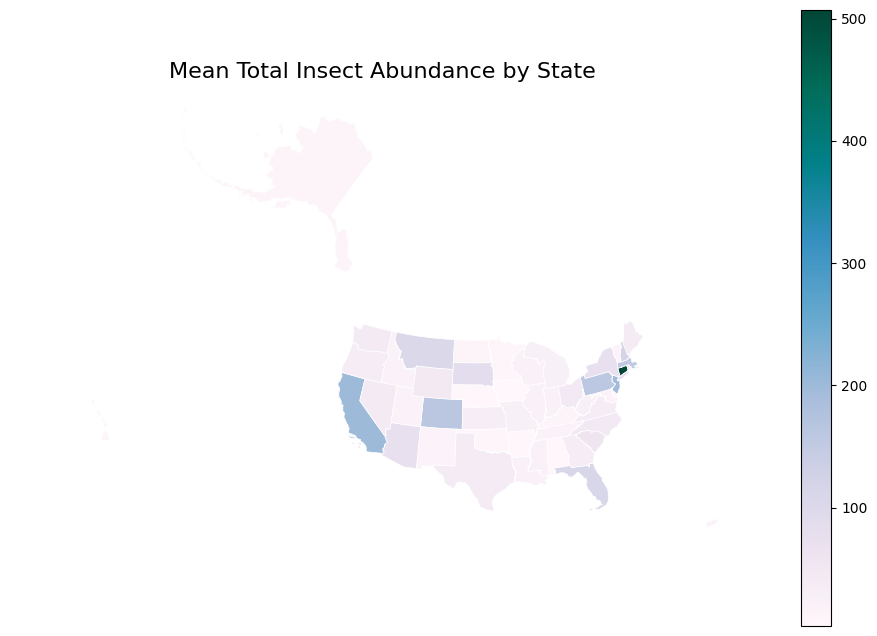

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
abund_gdf.plot(
    column='total_abundance',
    cmap='PuBuGn',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Mean Total Insect Abundance by State', fontsize=16)
ax.axis('off')
plt.show()


# Log Transformation to Handle Big Differences

## 1) Log-Transformed Total Abundance Map

In [ ]:
#Group and log-transform total_abundance
state_abund = merged_data.groupby('stateProvince', as_index=False)['total_abundance'].mean()
state_abund['log_total_abundance'] = np.log1p(state_abund['total_abundance'])  # log(1 + x) to avoid log(0)

In [ ]:
# Merge with geometry
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
abund_map = pd.merge(state_abund, geometry_map, on='stateProvince', how='left')
abund_gdf = gpd.GeoDataFrame(abund_map, geometry='geometry')


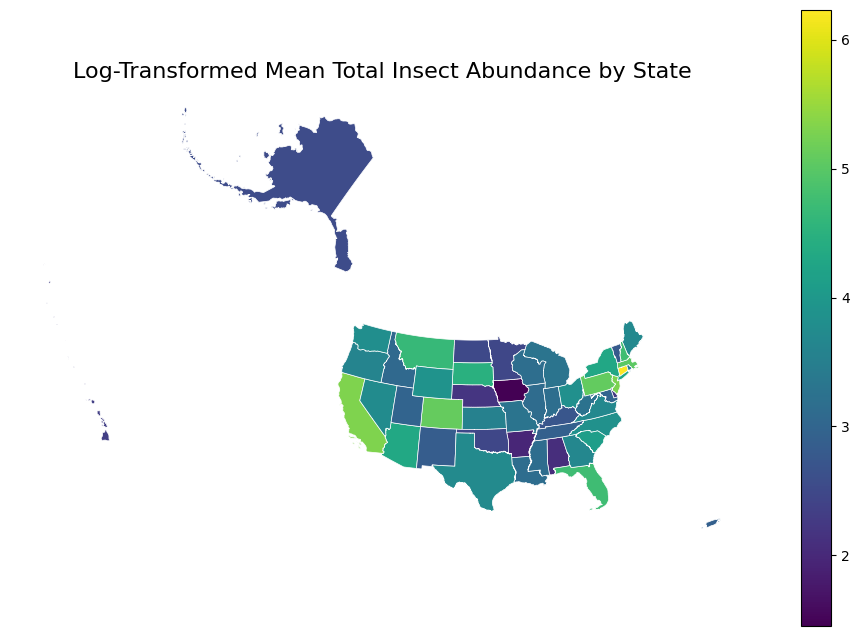

In [ ]:
# plotting
fig, ax = plt.subplots(figsize=(12, 8))
abund_gdf.plot(
    column='log_total_abundance',
    cmap='viridis',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Log-Transformed Mean Total Insect Abundance by State', fontsize=16)
ax.axis('off')
plt.show()

### Log-Transformed Total Richness Map

In [ ]:
# Mean richness per state
state_rich = merged_data.groupby('stateProvince', as_index=False)['total_richness'].mean()

# Log-transform it
state_rich['log_total_richness'] = np.log1p(state_rich['total_richness'])

In [ ]:
# Merge with geometries
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
rich_map = pd.merge(state_rich, geometry_map, on='stateProvince', how='left')

In [ ]:
#Convert to GeoDataFrame
rich_gdf = gpd.GeoDataFrame(rich_map, geometry='geometry')

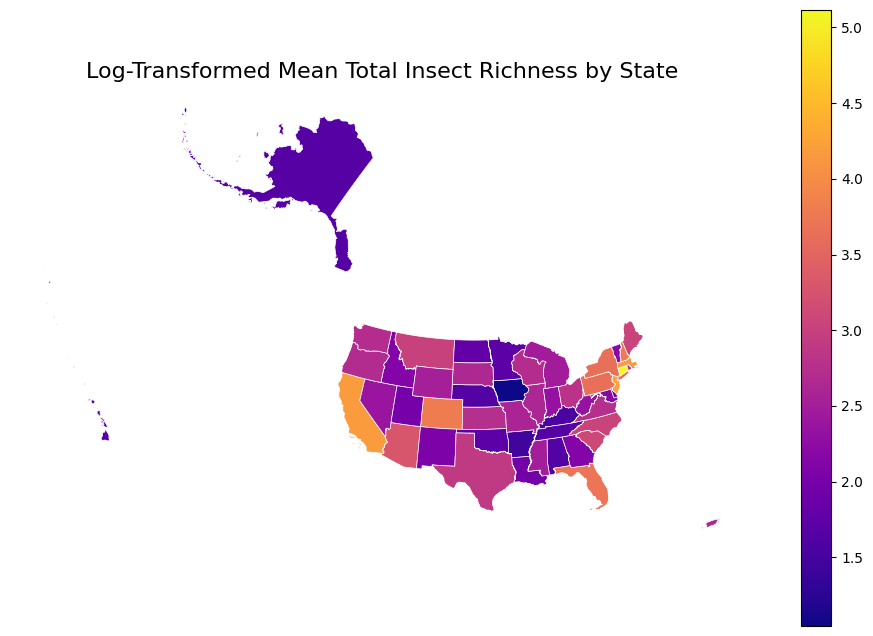

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
rich_gdf.plot(
    column='log_total_richness',
    cmap='plasma',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Log-Transformed Mean Total Insect Richness by State', fontsize=16)
ax.axis('off')
plt.show()

## Log of Nymphalidae Abundance by State

In [ ]:
# Group by state and calculate mean abundance
state_nymph = merged_data.groupby('stateProvince', as_index=False)['Nymphalidae_abundance'].mean()

# Log-transform
state_nymph['log_nymph_abundance'] = np.log1p(state_nymph['Nymphalidae_abundance'])

In [ ]:
geometry_map = merged_data[['stateProvince', 'geometry']].drop_duplicates('stateProvince')
nymph_map = pd.merge(state_nymph, geometry_map, on='stateProvince', how='left')


In [ ]:
nymph_gdf = gpd.GeoDataFrame(nymph_map, geometry='geometry')

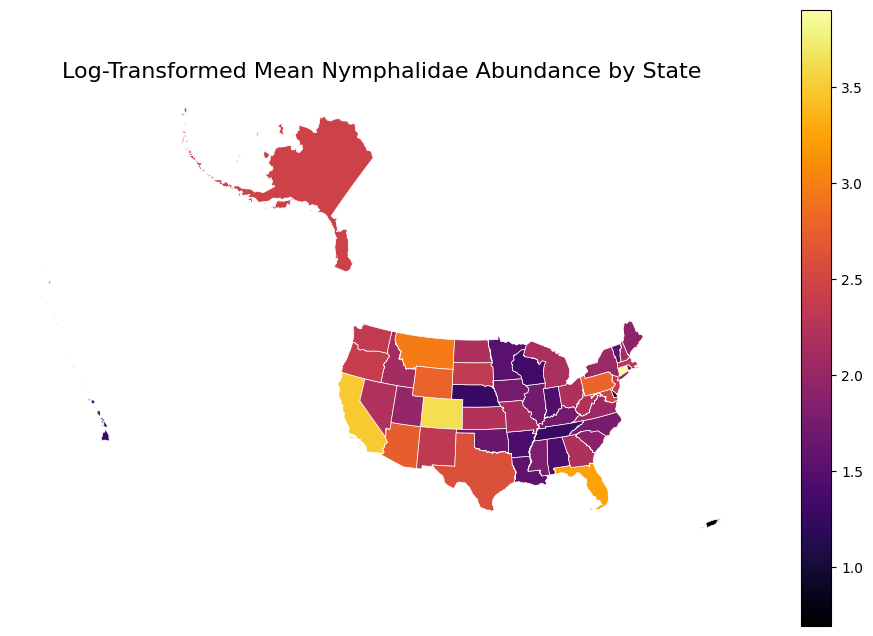

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
nymph_gdf.plot(
    column='log_nymph_abundance',
    cmap='inferno',
    linewidth=0.5,
    edgecolor='white',
    legend=True,
    ax=ax
)
ax.set_title('Log-Transformed Mean Nymphalidae Abundance by State', fontsize=16)
ax.axis('off')
plt.show()